<a href="https://colab.research.google.com/github/priiyaanjaalii0611/ForecastRetail/blob/main/TimeSeriesForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter('ignore')

**INSTALLING AND IMPORTING DEPENDENCIES**

In [2]:
pip install pystan==2.19.1.1

In [3]:
pip install prophet

     |████████████████████████████████| 65 kB 2.1 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638184 sha256=6b2a05aec75e10eef554b576741c5b2486b57544b254a21533ea466c31718385
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [4]:
import pandas as pd
from prophet import Prophet

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv')

In [7]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [8]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [13]:
print(df['Product'].unique())
print(df['Store'].unique())


[2667437]
['QLD_CW_ST0203']


In [17]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [19]:
df['Year']=df['Time Date'].apply(lambda x:str(x)[-4:])
df['Month']=df['Time Date'].apply(lambda x:str(x)[-6:-4])
df['Day']=df['Time Date'].apply(lambda x:str(x)[:-6])

In [20]:
df['ds']=pd.DataFrame(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [21]:
df['ds']=pd.DatetimeIndex(df['ds'])

In [22]:
df.dtypes


Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [23]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [26]:
df.drop(['Time Date','Product','Store','Year','Month','Day'],axis=1,inplace=True)

In [27]:
df.head()

,Value,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [28]:
df.columns=['y','ds']

**TRAINING MODEL**

In [32]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
m.fit(df)

**PREDICTION**

In [36]:
future=m.make_future_dataframe(periods=101,freq='D')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1176,2021-03-23,4242.490260,2109.951491,5349.887250,4238.922628,4245.915266,-531.142033,-531.142033,-531.142033,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-988.336418,-988.336418,-988.336418,0.0,0.0,0.0,3711.348228
1177,2021-03-24,4243.573777,2179.512626,5322.379005,4239.954915,4247.062418,-516.617783,-516.617783,-516.617783,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-980.665092,-980.665092,-980.665092,0.0,0.0,0.0,3726.955994
1178,2021-03-25,4244.657294,2251.386142,5420.883427,4240.987203,4248.192489,-485.373705,-485.373705,-485.373705,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-976.355633,-976.355633,-976.355633,0.0,0.0,0.0,3759.283589
1179,2021-03-26,4245.740811,2132.257311,5363.635039,4242.019491,4249.322185,-542.007695,-542.007695,-542.007695,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-975.906431,-975.906431,-975.906431,0.0,0.0,0.0,3703.733116
1180,2021-03-27,4246.824328,2017.141164,5393.782468,4243.051778,4250.473623,-525.368922,-525.368922,-525.368922,468.456246,468.456246,468.456246,-14.113443,-14.113443,-14.113443,-979.711725,-979.711725,-979.711725,0.0,0.0,0.0,3721.455406


In [34]:
forecast[['ds','yhat']].tail()

,ds,yhat
1176,2021-03-23,3711.348228
1177,2021-03-24,3726.955994
1178,2021-03-25,3759.283589
1179,2021-03-26,3703.733116
1180,2021-03-27,3721.455406


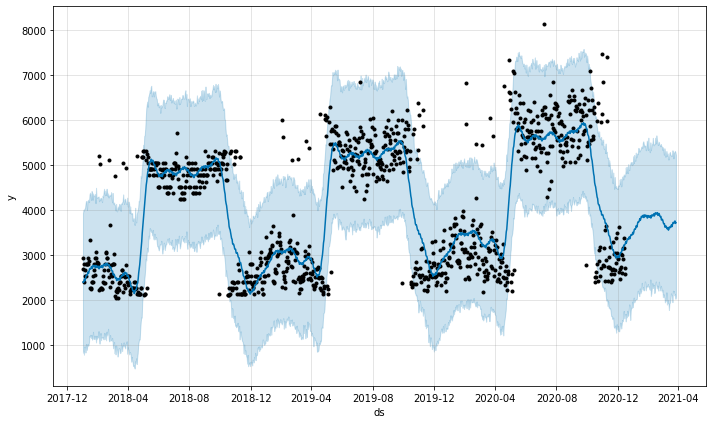

In [35]:
plot1=m.plot(forecast)


In [37]:
#BLUE LINE PREDICTS THE PREDICTION OR THE YHAT VALUE
# THE BLUE SHADED REGION INDICATES UPPER AND LOWER ESTIMATES OF YHAT VALUE

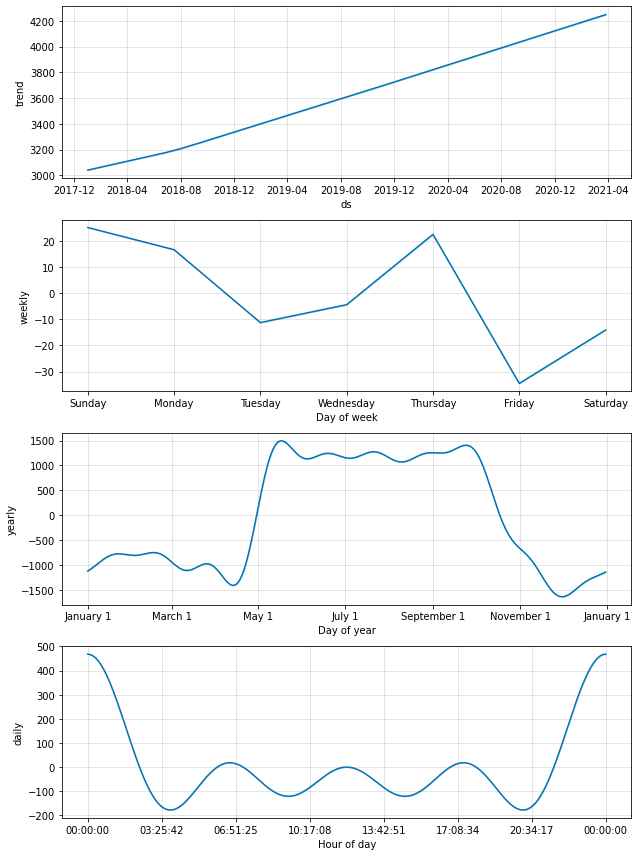

In [38]:
plot2=m.plot_components(forecast)